#### CLEANING DATA

In [73]:
import numpy as np # Data cleaning
import matplotlib.pyplot as plt #data plotting
import pandas as pd # Data ingest
from sklearn.preprocessing import MinMaxScaler # Data preprocessing

In [74]:
data = pd.read_csv('VAN.csv', date_parser = True)
data.tail()

,REF_DATE,GEO,VALUE
472,2020-05,"Vancouver, British Columbia",106.9
473,2020-06,"Vancouver, British Columbia",107.0
474,2020-07,"Vancouver, British Columbia",107.8
475,2020-08,"Vancouver, British Columbia",108.9
476,2020-09,"Vancouver, British Columbia",111.1


In [75]:
data_training = data[data['REF_DATE']<'2020-10']
data_training

,REF_DATE,GEO,VALUE
0,1981-01,"Vancouver, British Columbia",90.5
1,1981-02,"Vancouver, British Columbia",92.2
2,1981-03,"Vancouver, British Columbia",92.2
3,1981-04,"Vancouver, British Columbia",91.8
4,1981-05,"Vancouver, British Columbia",91.8
...,...,...,...
472,2020-05,"Vancouver, British Columbia",106.9
473,2020-06,"Vancouver, British Columbia",107.0
474,2020-07,"Vancouver, British Columbia",107.8
475,2020-08,"Vancouver, British Columbia",108.9


In [76]:
data_test = data[data['REF_DATE']<'2020-09'].copy()
data_test

,REF_DATE,GEO,VALUE
0,1981-01,"Vancouver, British Columbia",90.5
1,1981-02,"Vancouver, British Columbia",92.2
2,1981-03,"Vancouver, British Columbia",92.2
3,1981-04,"Vancouver, British Columbia",91.8
4,1981-05,"Vancouver, British Columbia",91.8
...,...,...,...
471,2020-04,"Vancouver, British Columbia",106.9
472,2020-05,"Vancouver, British Columbia",106.9
473,2020-06,"Vancouver, British Columbia",107.0
474,2020-07,"Vancouver, British Columbia",107.8


In [77]:
training_data = data_training.drop(['REF_DATE', 'GEO'], axis = 1) #cleaning the data to only include VALUE
training_data.head() #The columns included in final prediction

,VALUE
0,90.5
1,92.2
2,92.2
3,91.8
4,91.8


In [78]:
scaler = MinMaxScaler()
training_data = scaler.fit_transform(training_data)
training_data

array([[0.56540084],
       [0.60126582],
       [0.60126582],
       [0.592827  ],
       [0.592827  ],
       [0.59493671],
       [0.592827  ],
       [0.4978903 ],
       [0.43670886],
       [0.39451477],
       [0.30590717],
       [0.29746835],
       [0.29113924],
       [0.27637131],
       [0.22362869],
       [0.19831224],
       [0.14556962],
       [0.092827  ],
       [0.04852321],
       [0.03797468],
       [0.02742616],
       [0.03164557],
       [0.02320675],
       [0.01898734],
       [0.02953586],
       [0.0464135 ],
       [0.05907173],
       [0.06118143],
       [0.06329114],
       [0.06329114],
       [0.06540084],
       [0.06540084],
       [0.06540084],
       [0.06962025],
       [0.06962025],
       [0.06962025],
       [0.07172996],
       [0.07172996],
       [0.07594937],
       [0.07805907],
       [0.07805907],
       [0.07805907],
       [0.07805907],
       [0.07172996],
       [0.05274262],
       [0.04008439],
       [0.03164557],
       [0.031

In [79]:
X_train = []
y_train = []
training_data.shape[0] #verifying rows with VAN.csv

477

In [80]:
for i in range (100, training_data.shape[0]): # reads first 60 entries
    X_train.append(training_data[i-100:i])
    y_train.append(training_data[i, 0])

In [81]:
X_train, y_train = np.array(X_train), np.array(y_train)

In [82]:
X_train.shape, y_train.shape

((377, 100, 1), (377,))

#### BUILDING LSTM

In [83]:
from tensorflow.keras import Sequential # Groups linear data into layers
from tensorflow.keras.layers import Dense, LSTM, Dropout # Neural network layers, linear regression and overfitting stepout

In [84]:
regressior = Sequential() #THIS IS THE LINEAR REGRESSION VARIABLE

regressior.add(LSTM(units = 60, activation = 'relu', return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressior.add(Dropout(0.2))

regressior.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
regressior.add(Dropout(0.2))

regressior.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
regressior.add(Dropout(0.2))

regressior.add(LSTM(units = 120, activation = 'relu'))
regressior.add(Dropout(0.2))

regressior.add(Dense(units = 1))

In [85]:
regressior.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 100, 60)           14880     
_________________________________________________________________
dropout_4 (Dropout)          (None, 100, 60)           0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 100, 60)           29040     
_________________________________________________________________
dropout_5 (Dropout)          (None, 100, 60)           0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 100, 80)           45120     
_________________________________________________________________
dropout_6 (Dropout)          (None, 100, 80)           0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 120)              

In [86]:
regressior.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [87]:
regressior.fit(X_train, y_train, epochs = 50, batch_size = 32)

Epoch 1/50
12/12 [==============================] - 1s 60ms/step - loss: 0.1939
Epoch 2/50
12/12 [==============================] - 1s 63ms/step - loss: 0.0320
Epoch 3/50
12/12 [==============================] - 1s 62ms/step - loss: 0.0230
Epoch 4/50
12/12 [==============================] - 1s 63ms/step - loss: 0.0212
Epoch 5/50
12/12 [==============================] - 1s 63ms/step - loss: 0.0203
Epoch 6/50
12/12 [==============================] - 1s 63ms/step - loss: 0.0154
Epoch 7/50
12/12 [==============================] - 1s 63ms/step - loss: 0.0162
Epoch 8/50
12/12 [==============================] - 1s 63ms/step - loss: 0.0141
Epoch 9/50
12/12 [==============================] - 1s 63ms/step - loss: 0.0140
Epoch 10/50
12/12 [==============================] - 1s 63ms/step - loss: 0.0139
Epoch 11/50
12/12 [==============================] - 1s 64ms/step - loss: 0.0128
Epoch 12/50
12/12 [==============================] - 1s 64ms/step - loss: 0.0125
Epoch 13/50
12/12 [==================

#### PREPARE TEST DATASET

In [114]:
data_test.head()

,REF_DATE,GEO,VALUE
0,1981-01,"Vancouver, British Columbia",90.5
1,1981-02,"Vancouver, British Columbia",92.2
2,1981-03,"Vancouver, British Columbia",92.2
3,1981-04,"Vancouver, British Columbia",91.8
4,1981-05,"Vancouver, British Columbia",91.8


In [115]:
data_training.tail(100)

,REF_DATE,GEO,VALUE
377,2012-06,"Vancouver, British Columbia",95.8
378,2012-07,"Vancouver, British Columbia",95.9
379,2012-08,"Vancouver, British Columbia",95.9
380,2012-09,"Vancouver, British Columbia",95.8
381,2012-10,"Vancouver, British Columbia",95.9
...,...,...,...
472,2020-05,"Vancouver, British Columbia",106.9
473,2020-06,"Vancouver, British Columbia",107.0
474,2020-07,"Vancouver, British Columbia",107.8
475,2020-08,"Vancouver, British Columbia",108.9


In [116]:
past_100_months = data_training.tail(100)

In [117]:
df = past_100_months.append(data_test, ignore_index = True)
df = df.drop(['REF_DATE', 'GEO'], axis = 1)
df.head()

,VALUE
0,95.8
1,95.9
2,95.9
3,95.8
4,95.9


In [118]:
inputs = scaler.transform(df)
inputs

array([[0.67721519],
       [0.67932489],
       [0.67932489],
       [0.67721519],
       [0.67932489],
       [0.67088608],
       [0.66455696],
       [0.66455696],
       [0.66455696],
       [0.66244726],
       [0.66244726],
       [0.65822785],
       [0.65400844],
       [0.66033755],
       [0.65189873],
       [0.65189873],
       [0.64767932],
       [0.64556962],
       [0.64135021],
       [0.64135021],
       [0.64135021],
       [0.63924051],
       [0.63080169],
       [0.62869198],
       [0.62447257],
       [0.62236287],
       [0.62869198],
       [0.62869198],
       [0.6350211 ],
       [0.63291139],
       [0.63080169],
       [0.62869198],
       [0.62869198],
       [0.62869198],
       [0.64135021],
       [0.64135021],
       [0.64556962],
       [0.65400844],
       [0.65400844],
       [0.66244726],
       [0.66877637],
       [0.67721519],
       [0.6814346 ],
       [0.68987342],
       [0.70675105],
       [0.71518987],
       [0.71940928],
       [0.742

In [119]:
X_test = []
y_test = []

for i in range (100, inputs.shape[0]):
    X_test.append(inputs[i-100:i])
    y_test.append(inputs[i, 0])

In [120]:
X_test, y_test = np.array(X_test), np.array(y_test)
X_test.shape, y_test.shape

((476, 100, 1), (476,))

In [121]:
y_pred = regressior.predict(X_test)

In [122]:
y_pred #Not normalized need to do inverse scaling

array([[0.8523859 ],
       [0.854912  ],
       [0.85021675],
       [0.83716196],
       [0.81623745],
       [0.789026  ],
       [0.7576929 ],
       [0.7244095 ],
       [0.69033   ],
       [0.6559863 ],
       [0.6216102 ],
       [0.5872621 ],
       [0.55306566],
       [0.51925313],
       [0.48623788],
       [0.45432976],
       [0.4238329 ],
       [0.39498243],
       [0.36793926],
       [0.3428181 ],
       [0.319684  ],
       [0.29858026],
       [0.27955556],
       [0.26263908],
       [0.24780601],
       [0.2350105 ],
       [0.22422743],
       [0.21538429],
       [0.20839119],
       [0.20316887],
       [0.19967715],
       [0.1979306 ],
       [0.19787799],
       [0.19943537],
       [0.20249097],
       [0.20689505],
       [0.21246585],
       [0.21899971],
       [0.22625239],
       [0.23397872],
       [0.2419446 ],
       [0.24991736],
       [0.2576731 ],
       [0.26502144],
       [0.27179012],
       [0.27779657],
       [0.28293937],
       [0.287

In [123]:
scaler.scale_

array([0.02109705])

In [124]:
scale = 2/0.02109705 #This will bring it back to our expected value
scale

94.79998388400274

In [125]:
y_pred = y_pred*scale
y_test = y_test*scale

In [126]:
y_test

array([53.59999089, 56.99999031, 56.99999031, 56.19999045, 56.19999045,
       56.39999041, 56.19999045, 47.19999198, 41.39999296, 37.39999364,
       28.99999507, 28.19999521, 27.59999531, 26.19999555, 21.1999964 ,
       18.7999968 , 13.79999765,  8.7999985 ,  4.59999922,  3.59999939,
        2.59999956,  2.99999949,  2.19999963,  1.79999969,  2.79999952,
        4.39999925,  5.59999905,  5.79999901,  5.99999898,  5.99999898,
        6.19999895,  6.19999895,  6.19999895,  6.59999888,  6.59999888,
        6.59999888,  6.79999884,  6.79999884,  7.19999878,  7.39999874,
        7.39999874,  7.39999874,  7.39999874,  6.79999884,  4.99999915,
        3.79999935,  2.99999949,  2.99999949,  2.99999949,  2.99999949,
        1.99999966,  1.99999966,  0.        ,  0.        ,  0.19999997,
        0.19999997,  0.19999997,  0.19999997,  0.5999999 ,  0.79999986,
        0.19999997,  0.39999993,  0.39999993,  1.39999976,  1.79999969,
        1.59999973,  1.59999973,  1.59999973,  2.79999952,  2.99

#### MY ATTEMPT AT VISUALIZING THE DATA

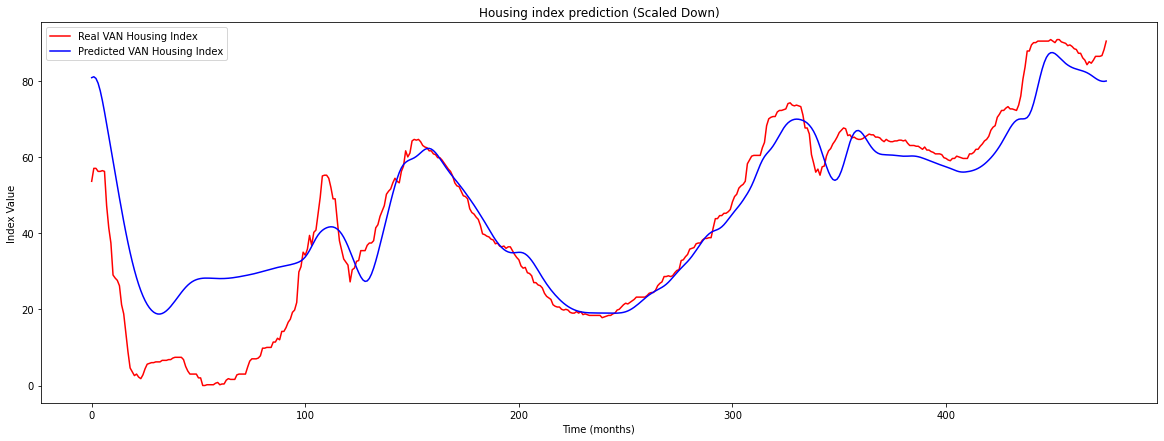

In [127]:
plt.figure(figsize =(20,7))
plt.plot(y_test, color = 'red', label = "Real VAN Housing Index")
plt.plot(y_pred, color = 'blue', label = "Predicted VAN Housing Index")
plt.title('Housing index prediction (Scaled Down)')
plt.xlabel('Time (months)')
plt.ylabel('Index Value')
plt.legend()
plt.show()